In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import preprocessing

In [59]:
data = pd.read_csv("Advertising.csv",index_col=0)
data.head()

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataScaled = pd.DataFrame(x_scaled)

In [3]:
X = data[['TV', 'Radio', 'Newspaper']].values
y = data[['Sales']].values

In [4]:
# Create a function for negative log likelihood
def negLogLikelihood(X, y, beta):
    return np.transpose(y - X@beta)@(y-X@beta)

In [5]:
# Create a function for gradient of negative log likelihood
def derivativeNegLogLikelihood(X, y, beta):
    return -np.transpose(X)@(y - X@beta)

In [12]:
# Calculate gradient descent. The function returns coefficients and the cost.
def gradientDescent(X, y, betaInitial, learningRate, maxIter):
        beta = betaInitial
        cost = np.zeros(maxIter)
        for i in range(maxIter):
            beta = beta - learningRate*derivativeNegLogLikelihood(X,y,beta)
            cost[i] = negLogLikelihood(X,y,beta)
        return beta, cost

In [13]:
# Add a "ones" column for the first feature.
# Initialize betas randomly.
XNoScale = np.column_stack((np.ones(X.shape[0]), X))
betaInitial = np.random.uniform(size = (XNoScale.shape[1],1))

print(negLogLikelihood(XNoScale, y, betaInitial))
print(derivativeNegLogLikelihood(XNoScale, y, betaInitial))

[[677236.519898]]
[[  10638.17500176]
 [1852770.06378462]
 [ 283172.11731577]
 [ 395303.86442878]]


The final negative log likelihood value: 719.8658314343613
The final negative log likelihood value: 719.8658314343613


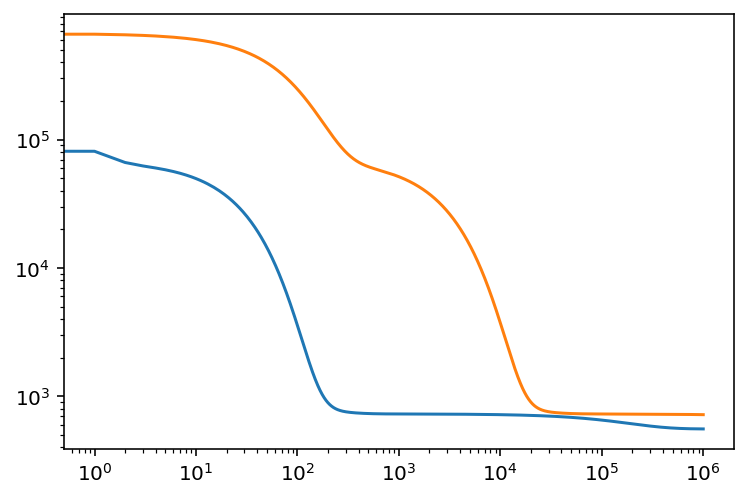

In [17]:
# Try different learning rates.
learningRate = 1e-9
maxIter = 10**6
betaFinalNoScale9, cost9 = gradientDescent(XNoScale, y, betaInitial, learningRate, maxIter)

# Try different learning rates.
learningRate7 = 1e-7
maxIter7 = 10**6
betaFinalNoScale7, cost7 = gradientDescent(XNoScale, y, betaInitial, learningRate7, maxIter7)



print(f'The final negative log likelihood value: {cost[-1]}')
plt.plot(range(maxIter7),cost7)
plt.xscale('log')
plt.yscale('log')

print(f'The final negative log likelihood value: {cost[-1]}')
plt.plot(range(maxIter),cost)
plt.xscale('log')
plt.yscale('log')

# Results seem sensitive to the parameter choice when the data is not scaled.

The final negative log likelihood value: 719.8658314343613
[[12.19808924]
 [ 3.43164406]
 [ 2.39790208]
 [ 0.347809  ]]


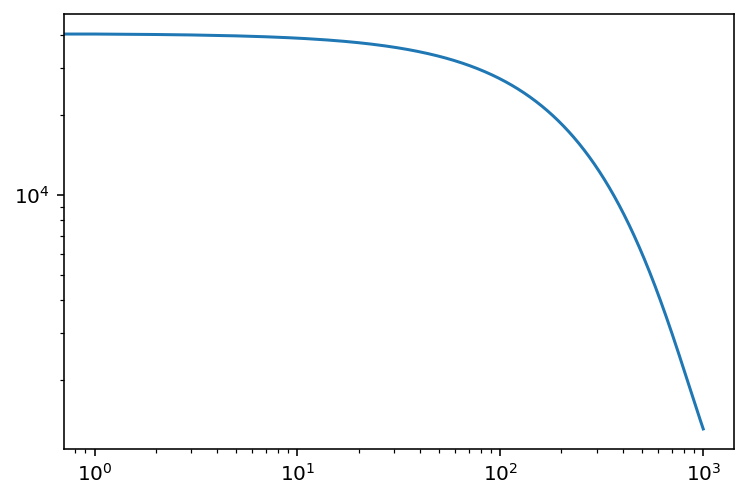

In [19]:
# Now scale the data, and check that it makes convergence faster

XScaled = (X - X.mean(axis=0))/X.std(axis=0)
XScaled = np.column_stack((np.ones(X.shape[0]), XScaled))
learningRate = 1e-5
maxIter = 10**3

betaFinalScaled, costs = gradientDescent(XScaled, y, betaInitial, learningRate, maxIter)
print(f'The final negative log likelihood value: {cost[-1]}')
print(betaFinalScaled)
plt.plot(range(maxIter),costs)
plt.xscale('log')
plt.yscale('log')

# Converges to the same log-likelihood value, but way faster.

Scaling the predictors make the system converge faster.

## Compare the results with statmodels OLS

In [20]:
import statsmodels.api as sm

In [21]:
fit = sm.OLS(y, XNoScale).fit()
fit.summary()
betaNoScale = pd.DataFrame(betaFinalNoScale, columns=['beta'], index=['bias', 'TV','News', 'Radio'])
betaNoScale

,beta
bias,0.576001
TV,0.052217
News,0.215636
Radio,0.013315


In [22]:
fit = sm.OLS(y, XScaled).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        10:05:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.000      13.787      14.258
x1             3.9193      0.119     32.809      0.000       3.684       4.155
x2             2.7921      0.128     21.893      0.000       2.541       3.044
x3            -0.0225      0.128     -0.177      0.860      -0.274       0.229
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Gradient descent and the blackbox alghoritm converges to different results. This is probably the gradient descent converges to a local minima.**

In [ ]:
TV = np.column_stack((np.ones(XScaled.shape[0]),XScaled[:,1]))
radio = np.column_stack((np.ones(XScaled.shape[0]),XScaled[:,2]))
newspapers = np.column_stack((np.ones(XScaled.shape[0]),XScaled[:,3]))


fitTV = sm.OLS(y, TV).fit()
fitRadio = sm.OLS(y, radio).fit()
fitNewspapers = sm.OLS(y, newspapers).fit()

In [30]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

Signal to noise ratio for newspapers :  4.742738589211618


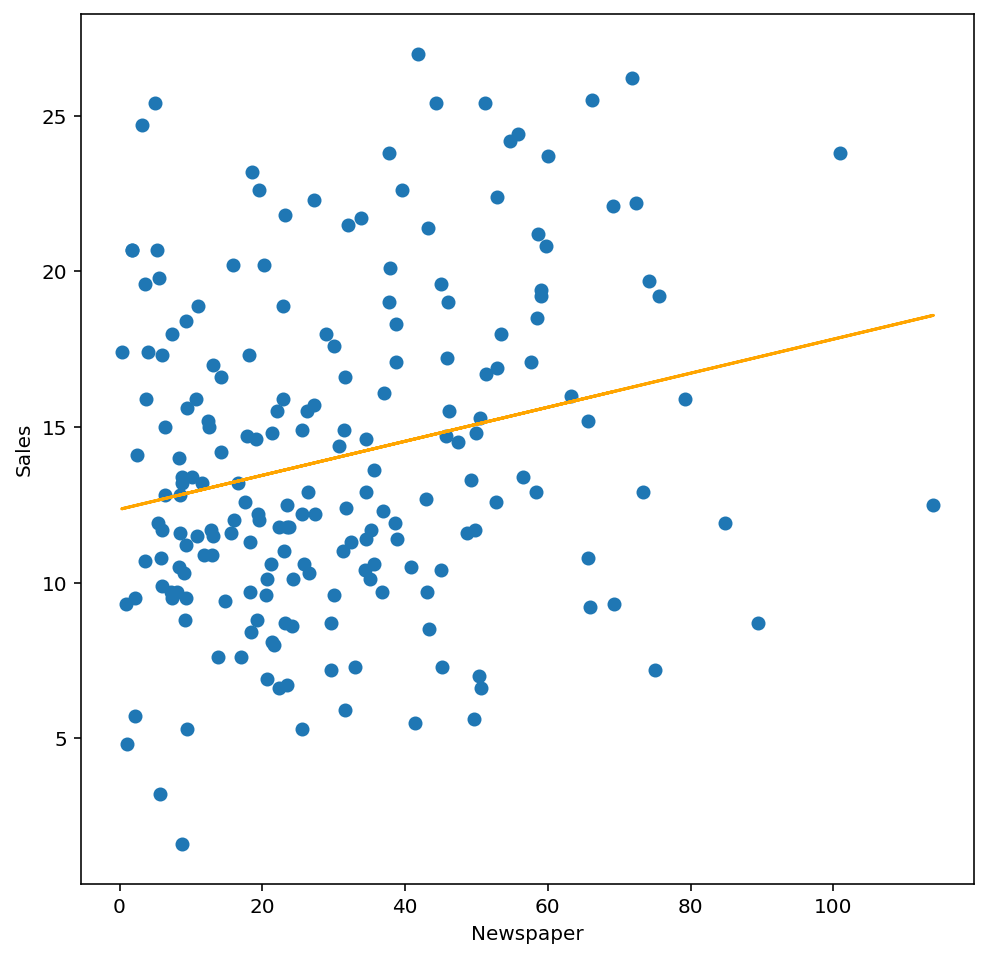

In [32]:
plt.figure(figsize=(8,8))

plt.scatter(X[:,2],y)
plt.plot(X[:,2], fitNewspapers.fittedvalues, color = 'orange')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
fitNewspapers.summary()
print ("Signal to noise ratio for newspapers : ",  
       signaltonoise(X[:2], axis = 0, ddof = 0)[2]) 

P values suggest that Newspaper advertisements would drive up the sales, and the regression model predicts the same thing too. However, there is a significant signal to noise ratio.

In [42]:
# fit
fitAll = sm.OLS(y, XScaled).fit()

fitAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.58e-96
Time:                        10:26:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.000      13.787      14.258
x1             3.9193      0.119     32.809      0.000       3.684       4.155
x2             2.7921      0.128     21.893      0.000       2.541       3.044
x3            -0.0225      0.128     -0.177      0.860      -0.274       0.229
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Sales')

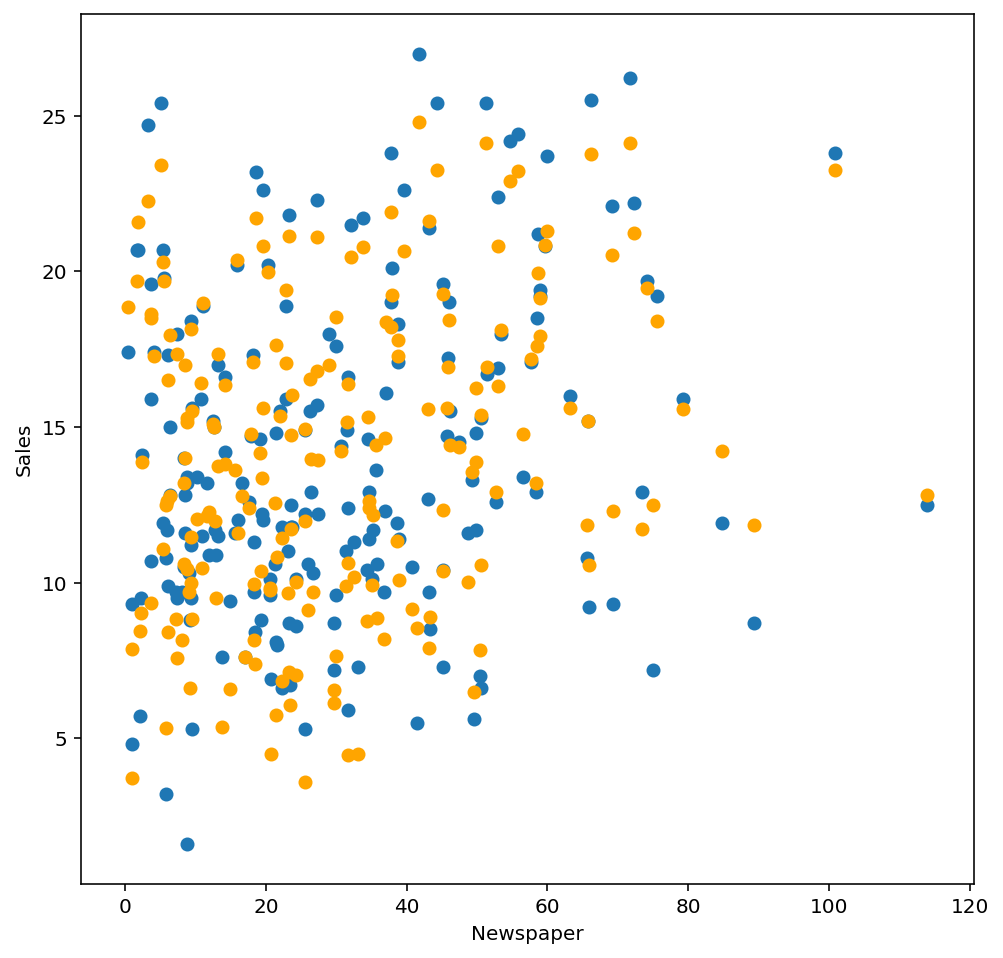

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,2],y)
plt.scatter(X[:,2], fitAll.fittedvalues, color = 'orange')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

When advertisement data from all media are taken into account predict the relationship ads and sales the p value jumps to 85%, which means the impact of newspapers ads on sales disappears become insignificant rapidly when compared to others media.

Multicollinearity is the answer here. As one can see below, the relation between TV and Radio is mostly random, however there seems to be some correlation between TV and Newspaper, Radio and Newspaper.

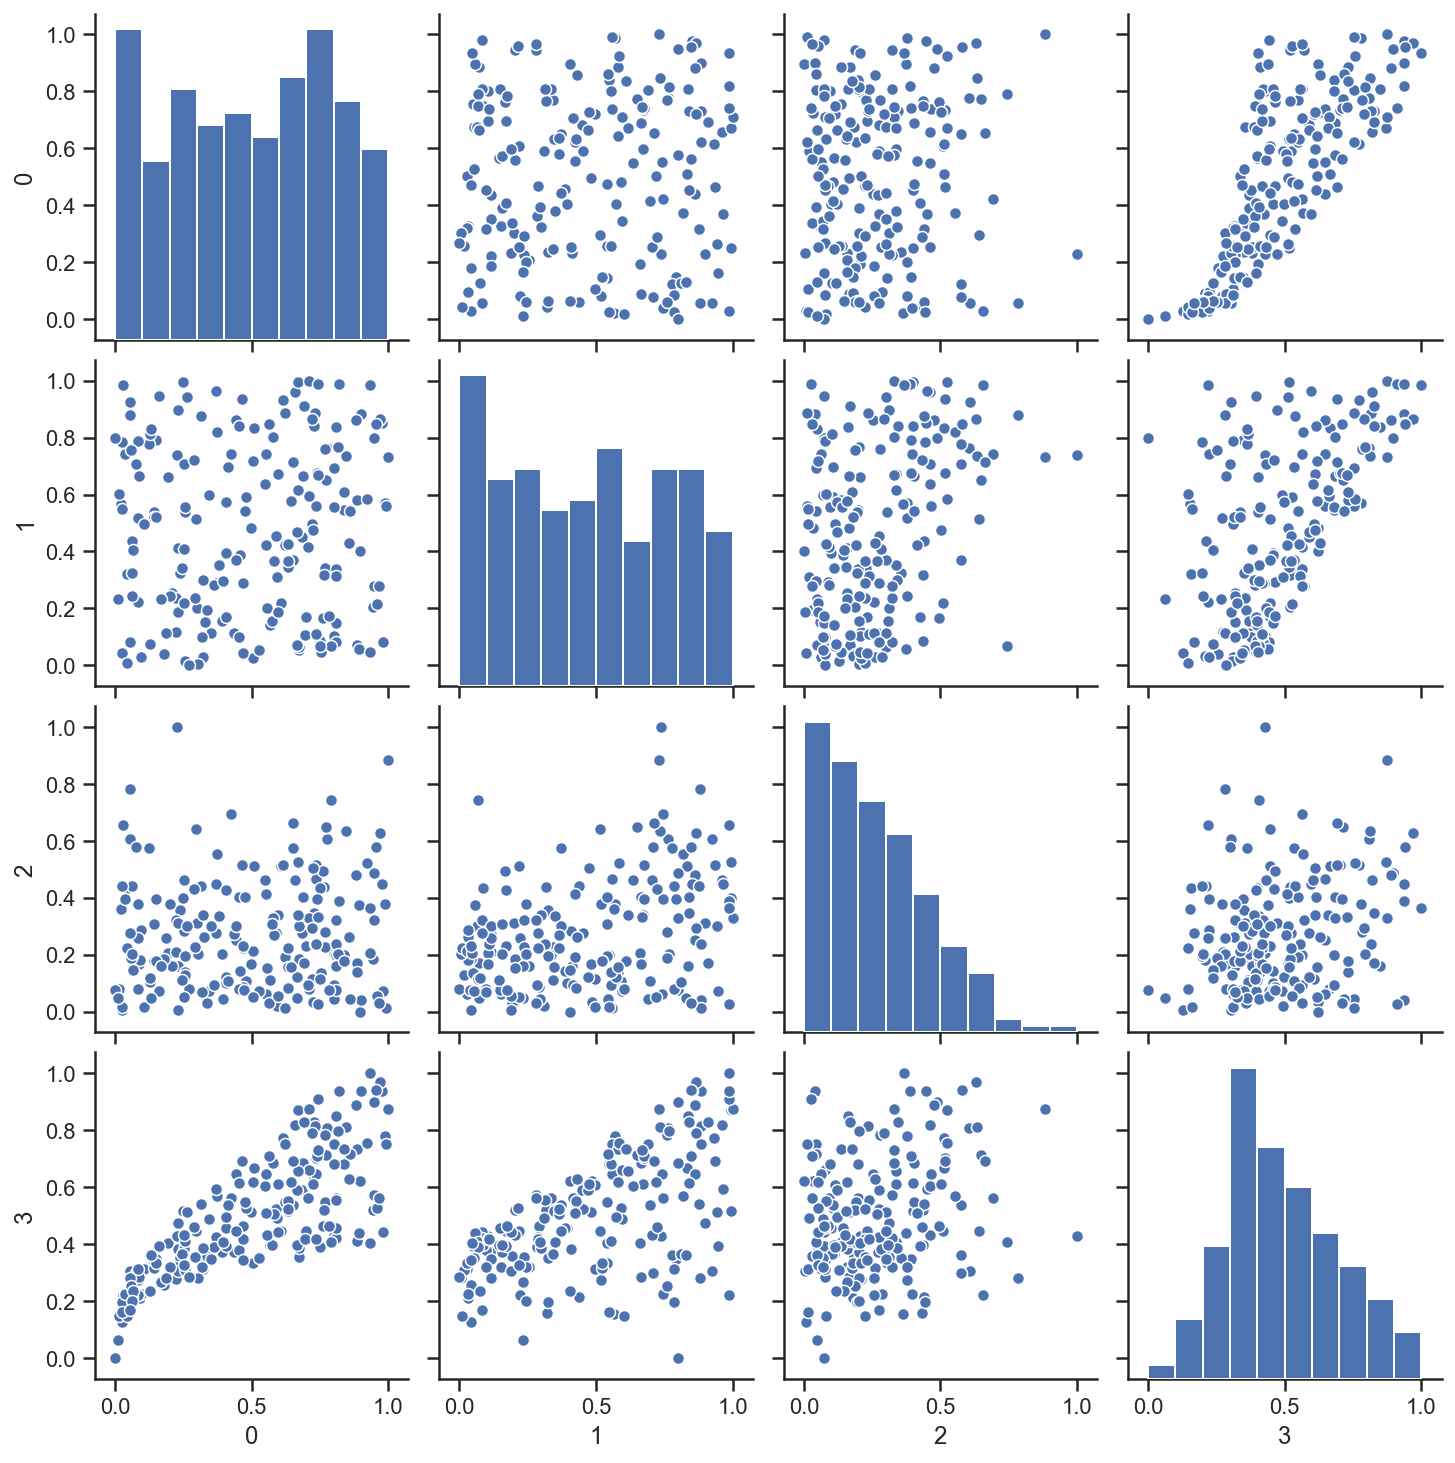

In [60]:
g = sns.pairplot(dataScaled)

## Residuals


Text(0, 0.5, 'Error')

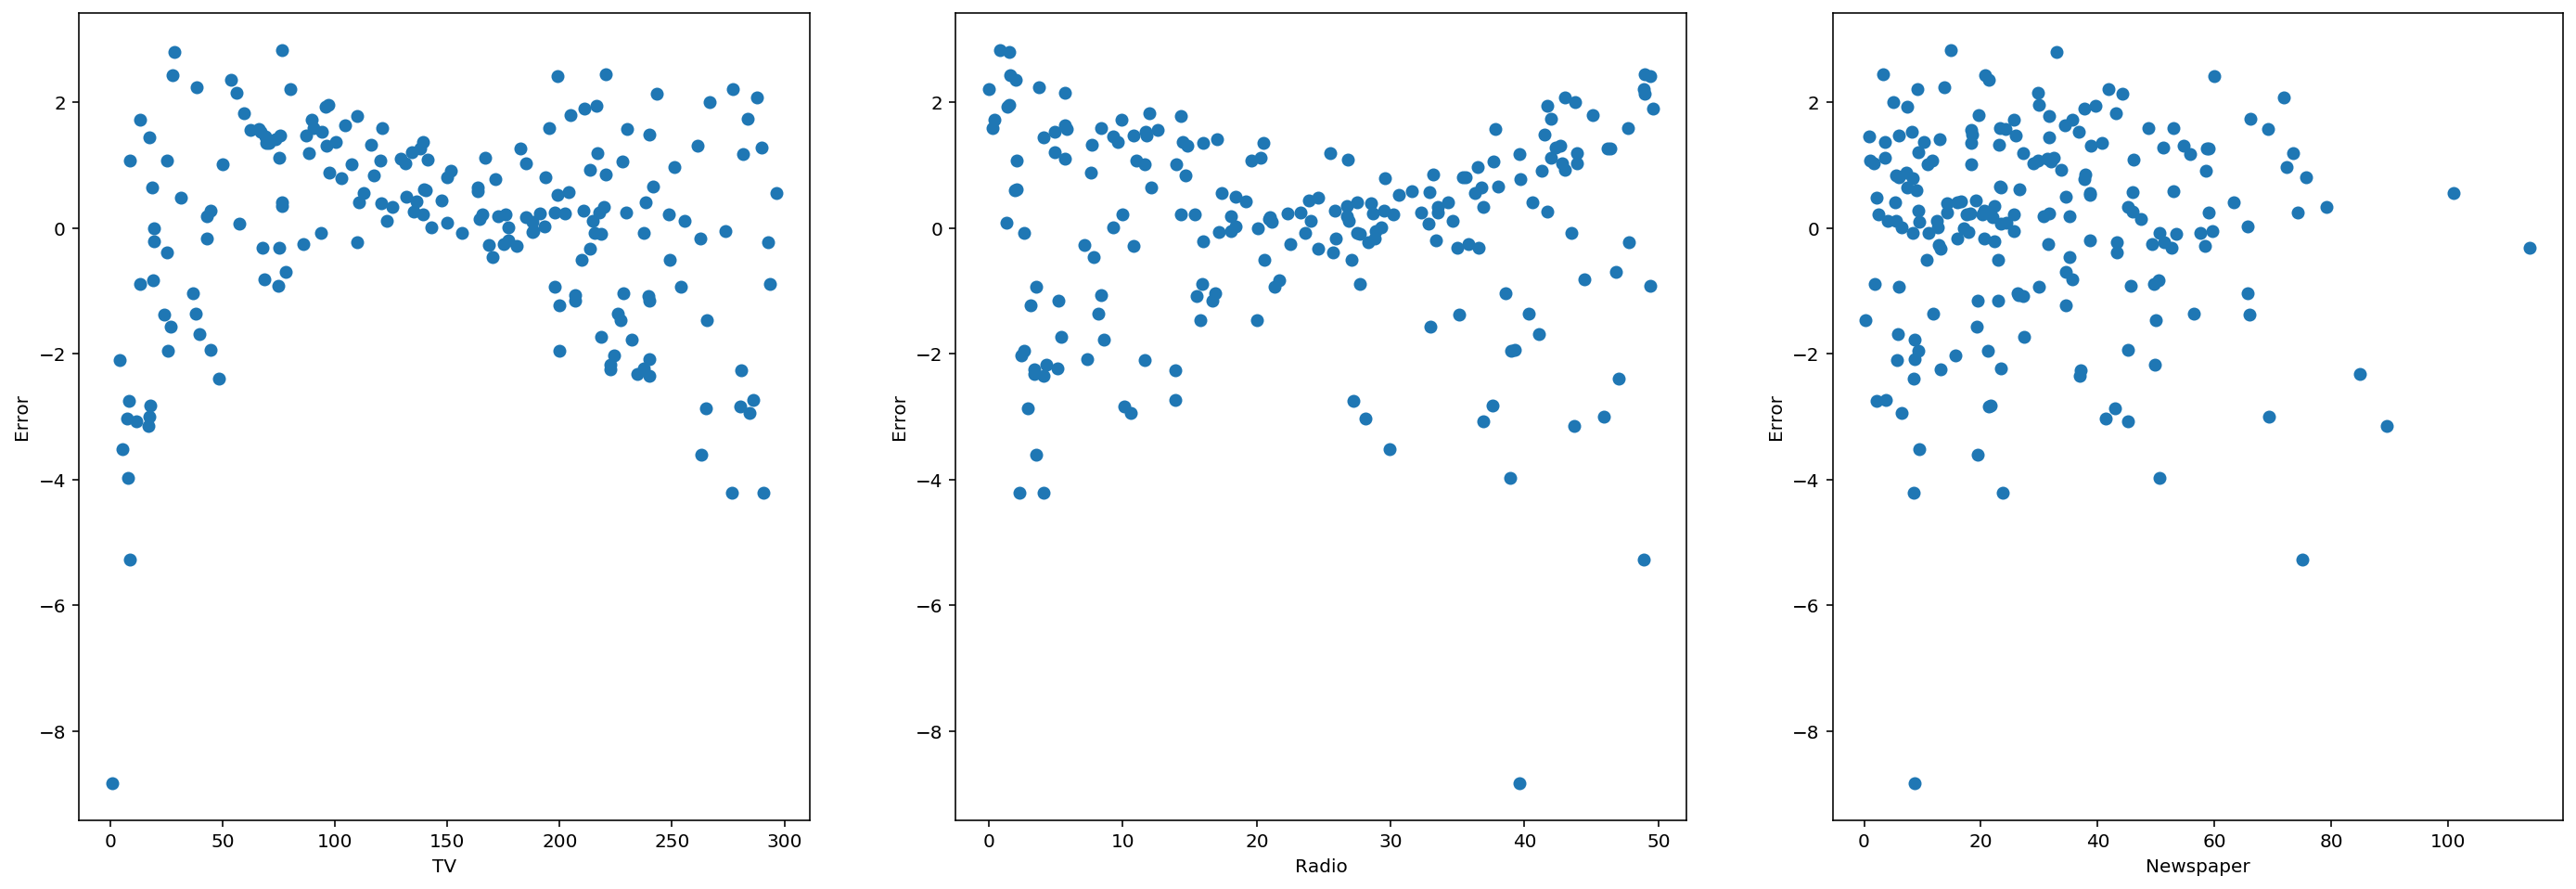

In [44]:
plt.figure(figsize=(24,8))

plt.subplot(1,3,1)
plt.scatter(X[:, 0],fitAll.resid)
plt.xlabel('TV')
plt.ylabel('Error')


plt.subplot(1,3,2)
plt.scatter(X[:, 1],fitAll.resid)
plt.xlabel('Radio')
plt.ylabel('Error')

plt.subplot(1,3,3)
plt.scatter(X[:, 2],fitAll.resid)
plt.xlabel('Newspaper')
plt.ylabel('Error')

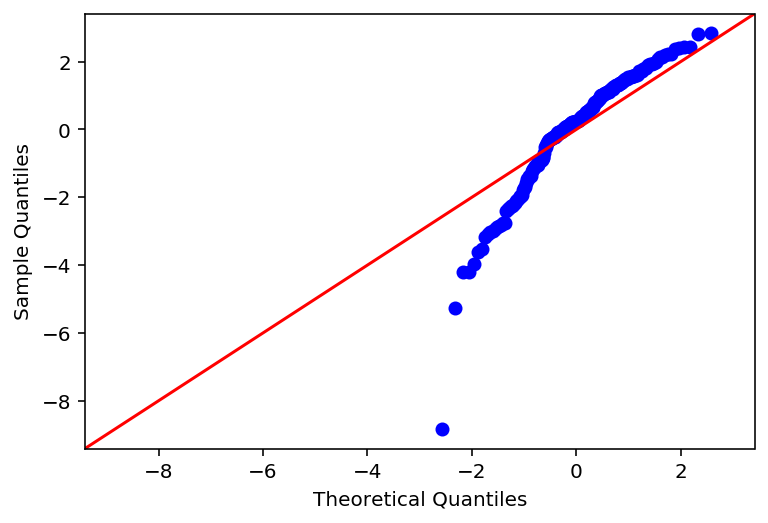

In [43]:
res = fitAll.resid # residuals
fig = sm.qqplot(res, line='45')
# QQ plot seems to be following a linear line down to -1 sample quantile.

WRSS is given by,

$WRSS = n^{-1}(y-X\beta)^T W (y-X\beta) =$

Our goal is to find $beta$ matrix that minimizes the WRSS. As usual we can do that by calculating the extremum points.

$\frac{d}{d\beta}(y-X\beta)^T W (y-X\beta) = 0$

Expand the WRSS expression. Note that $W$ is a diagonal matrix therefore $W^T = W$

$\frac{d}{d\beta}(y^T W y - \beta^T X^T W y - y^T W X\beta^T +  \beta^T X^T W X \beta) = 0$

$\frac{d}{d\beta}(0 -  X^T W y - X^T W y +  X^T W X \beta +  X^T W X \beta) = 0$

$X^T W y = X^T W X \beta \rightarrow \beta = (X^T W X)^{-1} X^T W y$


We are not given a weight matrix, so I will assume it is an identity matrix initially. According to the solution set it is possible to extract the weight matrix from the residuals.

In [18]:
W = np.eye(y.shape[0])
XWRSS = np.column_stack((np.ones(X.shape[0]), X))

betasWRSS = np.linalg.inv(np.transpose(XWRSS)@W@XWRSS)@np.transpose(XWRSS)@W@y
print(betasWRSS)

[[ 2.93888937e+00]
 [ 4.57646455e-02]
 [ 1.88530017e-01]
 [-1.03749304e-03]]


In [44]:
WRSS = ((y - XWRSS@betasWRSS).T@W@(y - XWRSS@betasWRSS))[0][0]
WRSS

556.8252629021872

Calculated weight matrix from residuals.

In [51]:
residuals = y - XWRSS@betasWRSS # Calculate residuals for each point
w = W*(1/residuals**2)

In [52]:
WRSSResidual = ((y - XWRSS@betasWRSS).T@w@(y - XWRSS@betasWRSS))[0][0]
WRSSResidual

200.0

A proper weight matrix reduces the minimum value of WRSS dramatically.

In [48]:
negLogLikelihood(XNoScale, y, betaFinalNoScale)[0][0]

758.7567834589747

Without the weight matrix the the system stucked at a local minimum.